## Male and Female Dataset

### 1 Import Library

In [23]:
import numpy as np
import pandas as pd 
import seaborn as sns
import keras
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

mypath = "D:\IT World\Magnimind_Academy\projects\dl_gender\celeb_small\input"
print(os.listdir(mypath))
#print(os.listdir("celeb_small\\input"))

['test_set', 'train_set']


### 2 Define Constants

In [24]:
import cv2
image_path = r"D:\IT World\Magnimind_Academy\projects\dl_gender\celeb_small\input 2\predictions\female9.jpg"
img = cv2.imread(image_path)
print("Orginal Shape    : ", img.shape)

# from tensorflow.keras.preprocessing import image
# img = image.load_img(image_path)
# img

Orginal Shape    :  (183, 275, 3)


In [25]:
FAST_RUN = True #False
IMAGE_WIDTH=224
IMAGE_HEIGHT=224
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

### 3 Prepare Traning Data

In [26]:
# Define male=1, female=0 
filenames = os.listdir(os.path.join(mypath, "train_set"))
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == "man":
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

print("df shape: ", df.shape)
df

df shape:  (3000, 2)


filename  category
0     female.000009.jpg         0
1     female.000031.jpg         0
2     female.000093.jpg         0
3     female.000142.jpg         0
4     female.000148.jpg         0
...                 ...       ...
2995     man.037129.jpg         1
2996     man.037138.jpg         1
2997     man.037153.jpg         1
2998     man.037167.jpg         1
2999     man.037196.jpg         1

[3000 rows x 2 columns]

#### 3.1 See Total In count

male=1, female=0


0    1500
1    1500
Name: category, dtype: int64

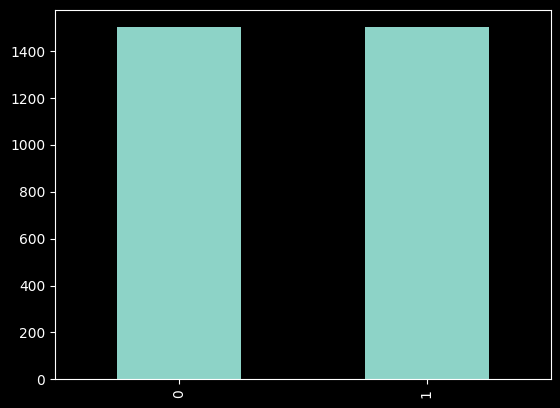

In [27]:
# male=1, female=0 
df.category.value_counts().plot.bar()
print("male=1, female=0")
df.category.value_counts()

#### 3.2 See sample image

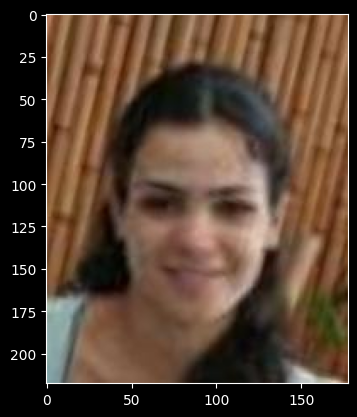

In [28]:
# from tensorflow.keras.preprocessing.image import load_img
pathimage=os.path.join(mypath, "train_set/")
sample = np.random.choice(filenames)
image = load_img(pathimage+sample)
plt.imshow(image);

### 4 Build Model

In [29]:
from keras.applications.vgg16 import VGG16

# include_top = whether to include the 3 fully-connected layers at the top of the network
vggmodel = VGG16(weights='imagenet', include_top=True)
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [30]:
print("len: ", len(vggmodel.layers))
vggmodel.layers

len:  23


#### 4.1 Alternative:1

In [31]:
mymodel = keras.Sequential()

for layer in vggmodel.layers[:-1]:
  mymodel.add(layer)
for layer in mymodel.layers:
  layer.trainable=False

In [32]:
for i in range(len(mymodel.layers)):
    print(mymodel.layers[i].trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [33]:
mymodel.add(Dense(2, activation="softmax"))
# mymodel.add(Dense(1, activation="sigmoid"))
mymodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [34]:
from keras.optimizers import SGD, Adam

optimizer = SGD(lr=0.0001, momentum=0.9)
# optimizer = "Adam"
mymodel.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

mymodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

c:\Users\gakbulut\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


#### 4.2 Alternative:2

In [35]:
last_layer = str(vggmodel.layers[-1])
# np.random.seed(99)
# random.set_seed(99)
mymodel = keras.Sequential()

In [36]:
vggmodel.layers, last_layer

([<keras.engine.input_layer.InputLayer at 0x1b6f099c7f0>,
 '<keras.layers.core.dense.Dense object at 0x000001B6F0A5EC50>')

In [37]:
print("lenght of new layer:", len(mymodel.layers))
# mymodel.summary()

lenght of new layer: 0


In [38]:
vggmodel.layers[0].trainable

True

In [39]:
for i in range(len(vggmodel.layers)):
    print(vggmodel.layers[i].trainable)

True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True


In [40]:
# mymodel.layers[0].trainable

In [41]:
for layer in mymodel.layers:
    layer.trainable = False

In [42]:
# mymodel.layers[0].trainable

In [43]:
# mymodel.add(Dense(1, activation="sigmoid"))
# mymodel.summary()

In [44]:
# mymodel.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
# mymodel.summary()

#### 4.3 Alternative:3

In [45]:
for layer in vggmodel.layers[:19]:   # till flatten dense
    print(layer)
    layer.trainable = False

In [46]:
X = vggmodel.layers[-2].output  # check whether -1 or -2
X

<KerasTensor: shape=(None, 4096) dtype=float32 (created by layer 'fc2')>

In [47]:
from keras.layers import Dense

predictions = Dense(2, activation="softmax")(X)
predictions

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense_2')>

In [48]:
vggmodel.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_2')>

In [49]:
from keras.models import Model

mymodel = Model(inputs = vggmodel.input, outputs = predictions)
mymodel

In [50]:
from keras.optimizers import SGD, Adam

optimizer = SGD(lr=0.0001, momentum=0.9)
# optimizer = "Adam"
mymodel.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

mymodel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### 5 Callbacks

In [51]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [52]:
# earlystop
earlystop = EarlyStopping(patience=10)

# learning_rate_reduction
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, 
                             monitor='val_accuracy', 
                             verbose=1,   
                            save_best_only=True, 
                            mode='max')

# callbacks
callbacks = [earlystop, learning_rate_reduction, checkpoint]

### 6 Prepare data

Because we will use image generator `with class_mode="categorical"`. We need to convert column category into string. Then imagenerator will convert it one-hot encoding which is good for our classification. 

So we will convert 1 to male and 0 to female

In [53]:
df["category"] = df["category"].replace({1:"male", 0:"female"}) 
df

filename category
0     female.000009.jpg   female
1     female.000031.jpg   female
2     female.000093.jpg   female
3     female.000142.jpg   female
4     female.000148.jpg   female
...                 ...      ...
2995     man.037129.jpg     male
2996     man.037138.jpg     male
2997     man.037153.jpg     male
2998     man.037167.jpg     male
2999     man.037196.jpg     male

[3000 rows x 2 columns]

In [54]:
from sklearn.model_selection import train_test_split

train_df, validate_df = train_test_split(df, test_size=0.20, random_state=99)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

print("train_df : {}\nvalidate_df : {}".format(train_df.shape, validate_df.shape))

train_df : (2400, 2)
validate_df : (600, 2)


male=1, female=0


male      1201
female    1199
Name: category, dtype: int64

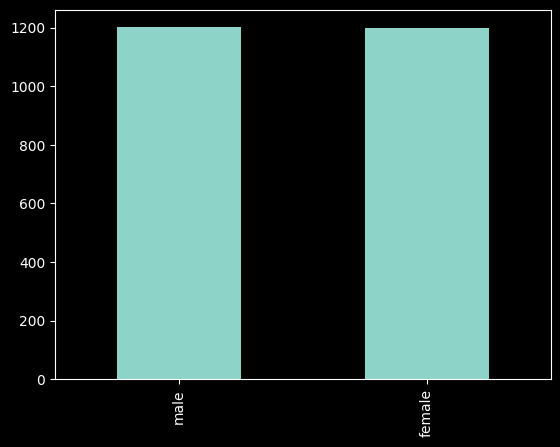

In [55]:
# male=1, female=0 
train_df.category.value_counts().plot.bar()
print("male=1, female=0")
train_df.category.value_counts()

In [56]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=20

### 7 Generating

#### 7.1 Traning Generator

In [57]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    pathimage, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 2400 validated image filenames belonging to 2 classes.


#### 7.2 Validation Generator

In [58]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    pathimage, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 600 validated image filenames belonging to 2 classes.


### 8 See how our generator work

Found 1 validated image filenames belonging to 1 classes.
[1.]


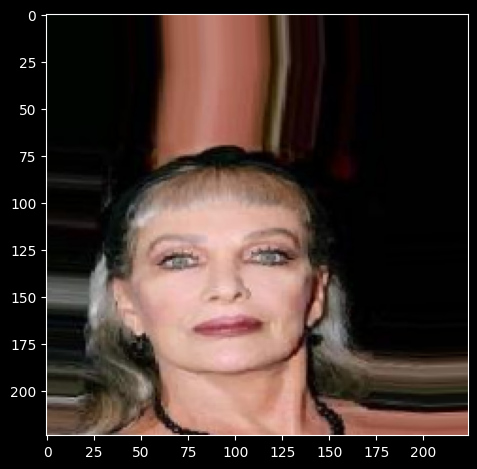

In [59]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    pathimage, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

for X_batch, Y_batch in example_generator:
    image = X_batch[0]
    tt = Y_batch[0]
    plt.imshow(image)
    print(tt)
    break
plt.tight_layout()
plt.show()

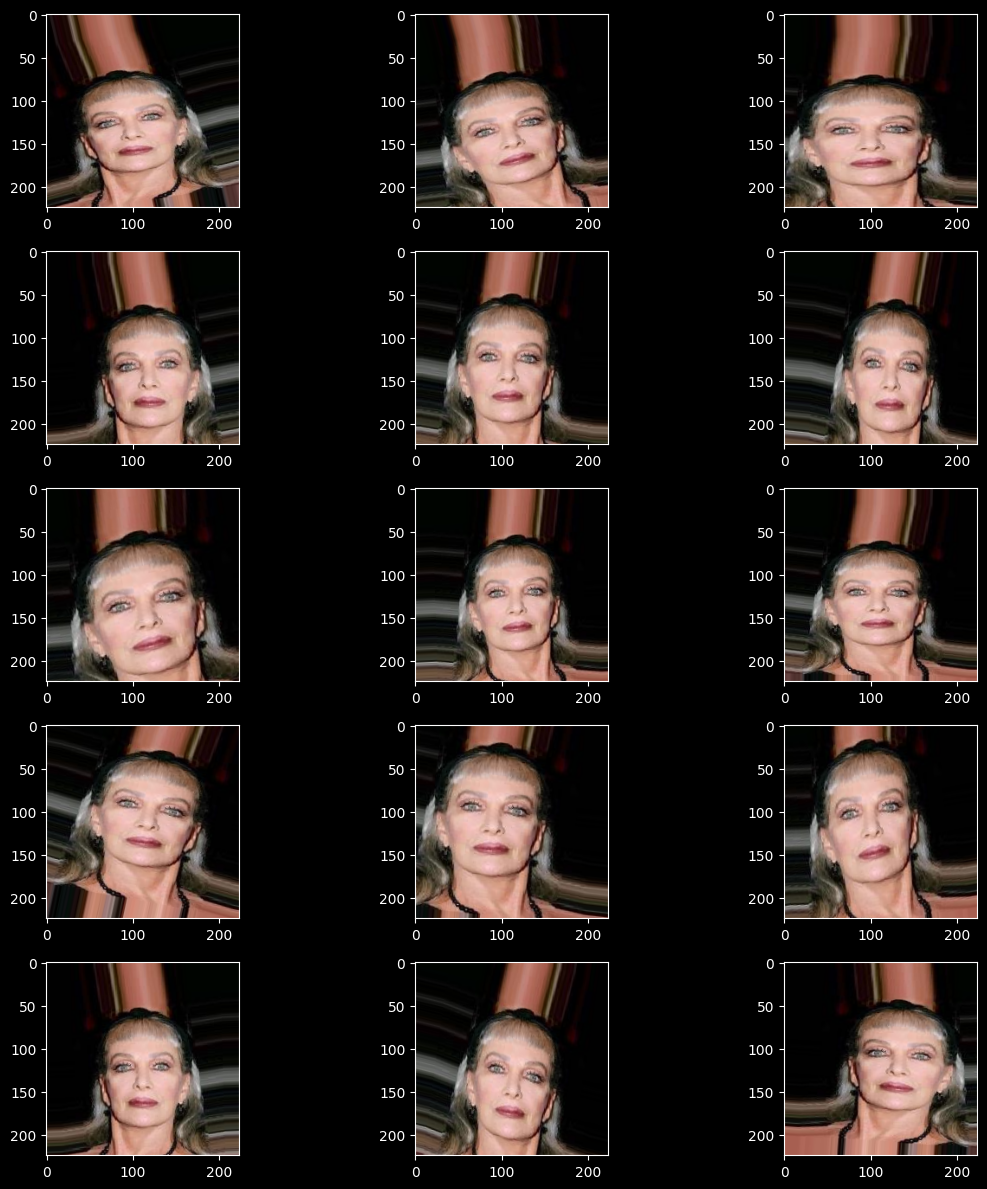

In [60]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

### 9 Fit Model

In [61]:
validation_steps=total_validate//batch_size
steps_per_epoch=total_train//batch_size

print("total_validate: ", total_validate)
print("total_train: ", total_train)
print("batch_size: ", batch_size)
print("validation_steps: ", validation_steps)
print("steps_per_epoch: ", steps_per_epoch)

total_validate:  600
total_train:  2400
batch_size:  20
validation_steps:  30
steps_per_epoch:  120


In [62]:
import tensorflow
print(tensorflow.test.gpu_device_name())

# tensorflow.device('/device:GPU:0')

# model.reset_states()

In [67]:
# epochs=3 if FAST_RUN else 10
# with tensorflow.device('/device:GPU:0'):
#     history = mymodel.fit_generator(
#         train_generator, 
#         epochs=epochs,
#         validation_data=validation_generator,
#         validation_steps=total_validate//batch_size,
#         steps_per_epoch=total_train//batch_size,
#         callbacks=callbacks
#     )

epochs=10 if FAST_RUN else 20
history = mymodel.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

C:\Users\gakbulut\AppData\Local\Temp\ipykernel_21244\2022287016.py:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = mymodel.fit_generator(


Epoch 1/10
120/120 [==============================] - ETA: 0s - loss: 0.5796 - accuracy: 0.7337 
Epoch 1: val_accuracy improved from 0.74667 to 0.77500, saving model to weights-improvement-01-0.77.hdf5
120/120 [==============================] - 1706s 14s/step - loss: 0.5796 - accuracy: 0.7337 - val_loss: 0.5430 - val_accuracy: 0.7750 - lr: 1.0000e-04
Epoch 2/10
120/120 [==============================] - ETA: 0s - loss: 0.5391 - accuracy: 0.7550
Epoch 2: val_accuracy improved from 0.77500 to 0.80500, saving model to weights-improvement-02-0.81.hdf5
120/120 [==============================] - 1252s 10s/step - loss: 0.5391 - accuracy: 0.7550 - val_loss: 0.4960 - val_accuracy: 0.8050 - lr: 1.0000e-04
Epoch 3/10
120/120 [==============================] - ETA: 0s - loss: 0.5133 - accuracy: 0.7800
Epoch 3: val_accuracy did not improve from 0.80500
120/120 [==============================] - 1186s 10s/step - loss: 0.5133 - accuracy: 0.7800 - val_loss: 0.4854 - val_accuracy: 0.7950 - lr: 1.0000e-

### 10 Save Model

In [73]:
mymodel.save("transferLearning_5_model_male_female.h5")
mymodel.save_weights("transferLearning_model_5_weight_male_female.h5")

### 11 Load the model

In [77]:
from keras.models import load_model

mymodel = load_model("transferLearning_5_model_male_female.h5")

### 12 Virtualize Training

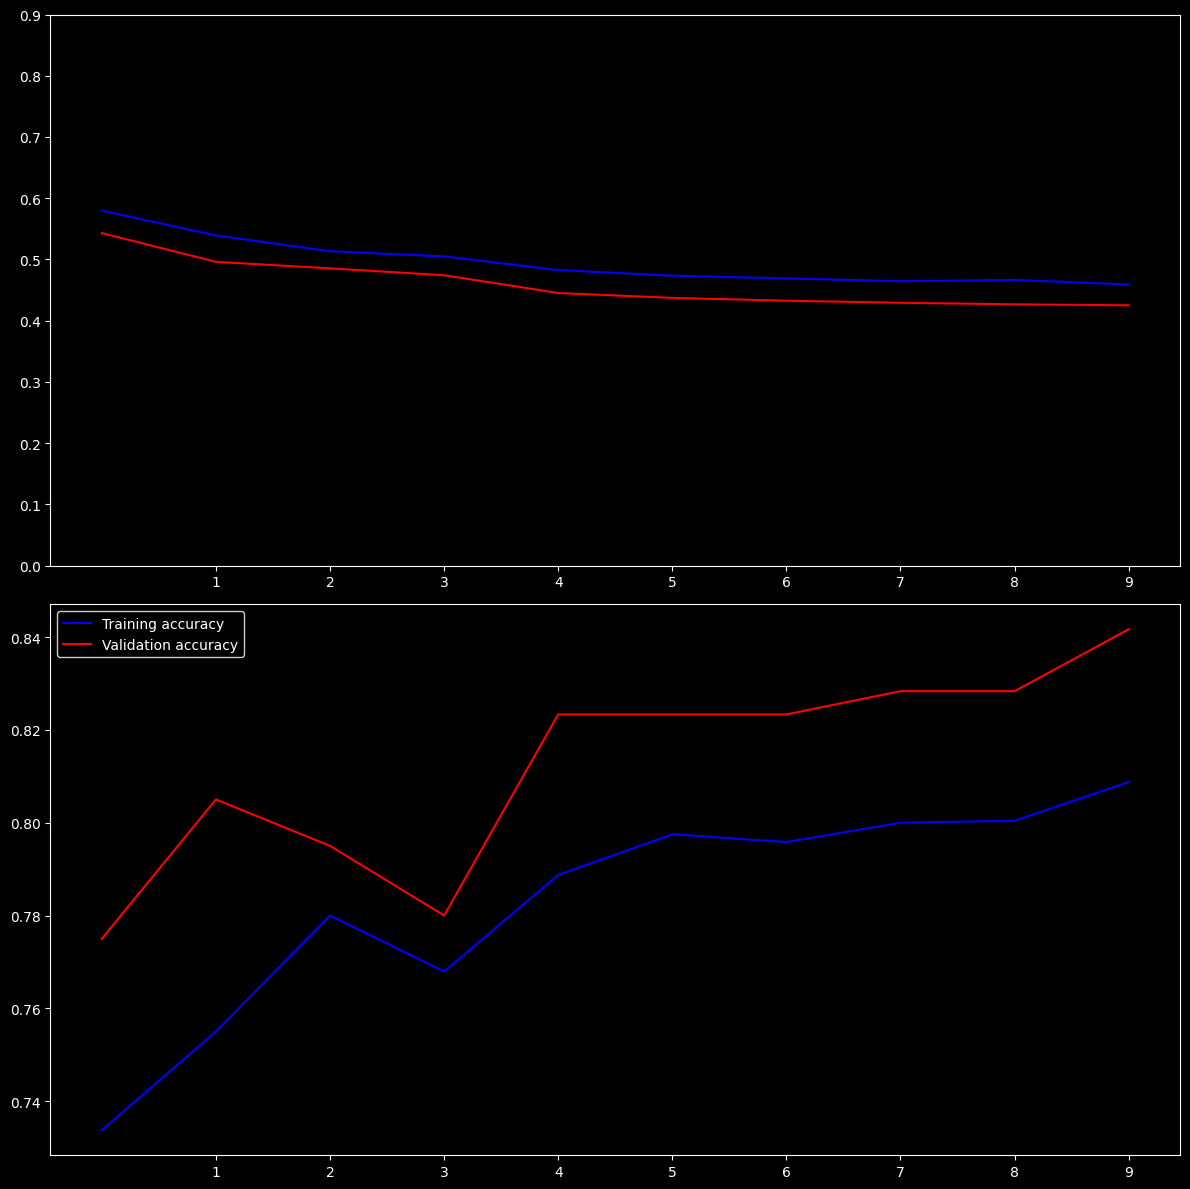

In [78]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

### 13 Prepare Testing Data

In [79]:
# test_filenames = os.listdir(os.path.join(mypath, "test_set"))
test_path = os.path.join(mypath, "test_set")
test_filenames = os.listdir(test_path)
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]
print("nb_samples: ", nb_samples)
test_df

nb_samples:  801


filename
0    female.026569.jpg
1    female.026586.jpg
2    female.026590.jpg
3    female.026619.jpg
4    female.026621.jpg
..                 ...
796     man.047676.jpg
797     man.047686.jpg
798     man.047687.jpg
799     man.047690.jpg
800     man.047731.jpg

[801 rows x 1 columns]

### 14 Create Testing Generator

In [80]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    test_path, 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 801 validated image filenames.


### 15 Predict

In [82]:
predict = mymodel.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size), verbose=1)
predict.shape

C:\Users\gakbulut\AppData\Local\Temp\ipykernel_21244\3090628176.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = mymodel.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size), verbose=1)


41/41 [==============================] - 303s 7s/step


(801, 2)

In [83]:
test_df['category'] = np.argmax(predict, axis=-1)
test_df['category'].shape

(801,)

In [84]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
test_df['category']

0      female
1      female
2        male
3      female
4      female
        ...  
796      male
797      male
798      male
799      male
800      male
Name: category, Length: 801, dtype: object

In [86]:
test_df['category'] = test_df['category'].replace({ 'male': 1, 'female': 0 })
test_df['category']

0      0
1      0
2      1
3      0
4      0
      ..
796    1
797    1
798    1
799    1
800    1
Name: category, Length: 801, dtype: int64

### 16 Virtualize Result

1    417
0    384
Name: category, dtype: int64

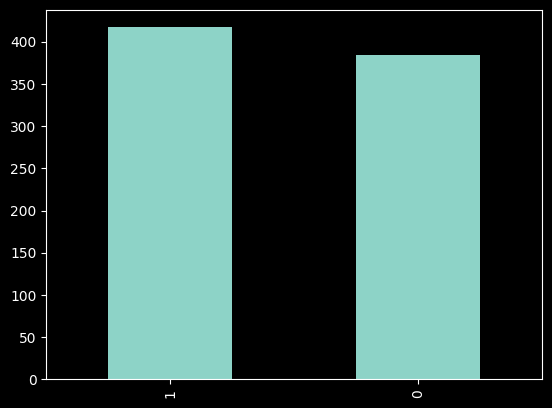

In [87]:
test_df['category'].value_counts().plot.bar()
test_df['category'].value_counts()

### 17 See predicted result with images

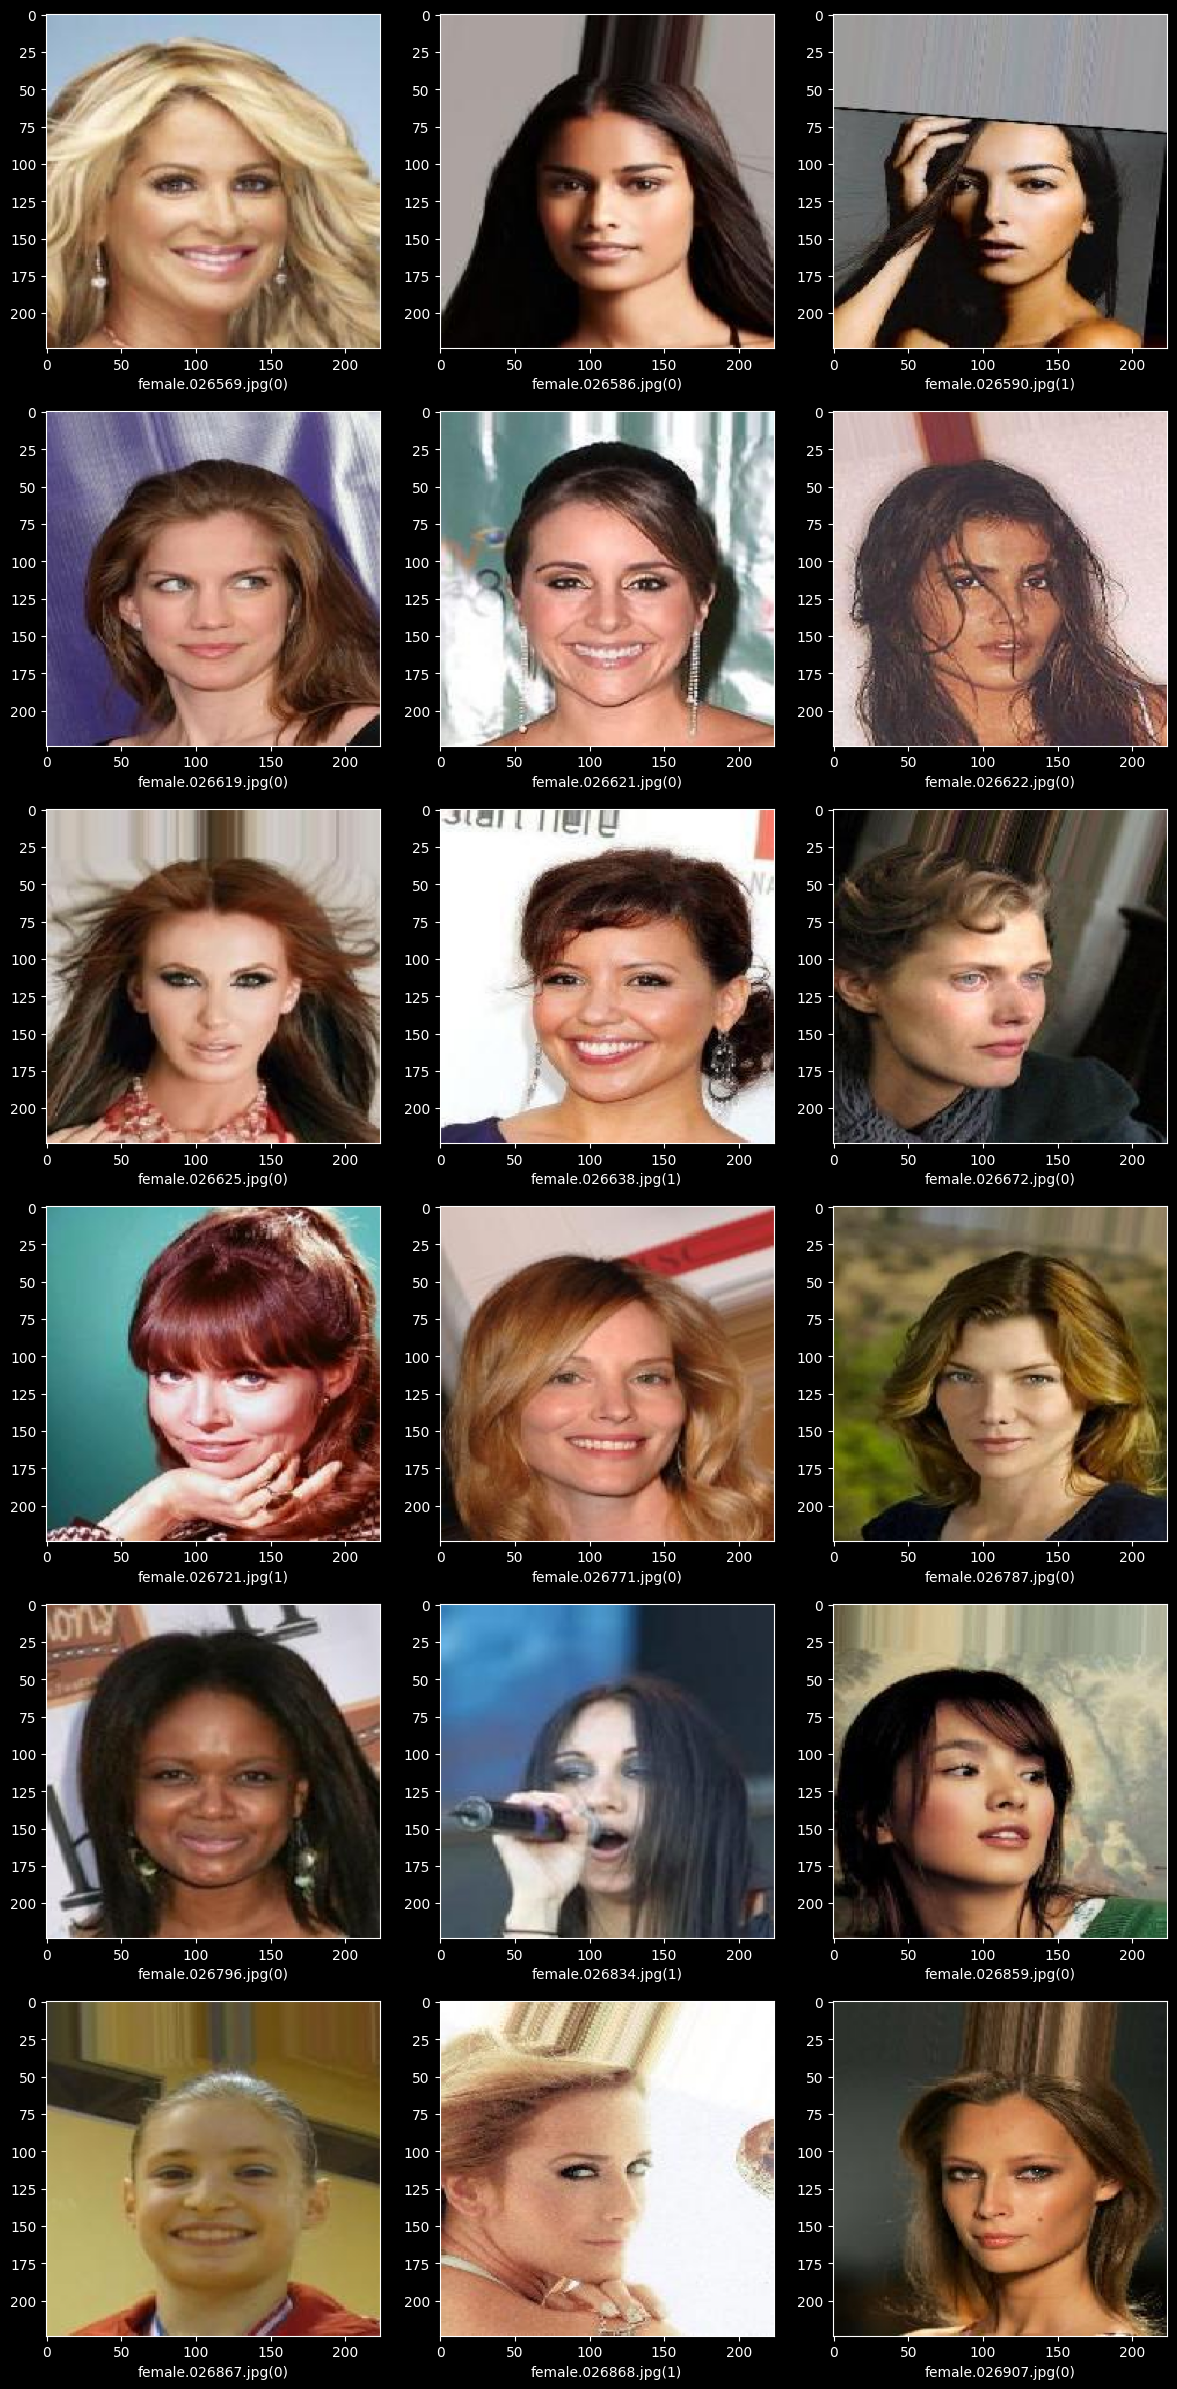

In [88]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img(test_path+"/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

### 17 Submission

In [89]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)
print("submission_df is saved as submission.csv")
submission_df

submission_df is saved as submission.csv


id  label
0    female      0
1    female      0
2    female      1
3    female      0
4    female      0
..      ...    ...
796     man      1
797     man      1
798     man      1
799     man      1
800     man      1

[801 rows x 2 columns]